In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from numpy import array

## sklearn.feature_extraction

### [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html?highlight=dictvectorizer)

In [2]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [3]:
v.inverse_transform(X) == [{'bar': 2.0, 'foo': 1.0},
...                            {'baz': 1.0, 'foo': 3.0}]
v.transform({'foo': 4, 'unseen_feature': 3})

array([[0., 0., 4.]])

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
v = DictVectorizer()
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
support = SelectKBest(chi2, k=2).fit(X, [0, 1])
v.get_feature_names_out()

array(['bar', 'baz', 'foo'], dtype=object)

In [5]:
v.restrict(support.get_support())

DictVectorizer()

In [6]:
v.get_feature_names_out()

array(['bar', 'foo'], dtype=object)

### [FeatureHasher](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html)

In [7]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

## sklearn.feature_extraction.text

### [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidfvectorizer)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [9]:
print(X.shape)

(4, 9)


### [CountVectorizer](https://https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [11]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## sklearn.feature_selection

### [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html?highlight=variancethreshold)


In [12]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

### [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html?highlight=selectkbest)


In [13]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [14]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

### [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html?highlight=selectpercentile)


In [15]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [16]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

### [GenericUnivariateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html?highlight=genericunivariateselect)


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

In [18]:
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)
X_new.shape

(569, 20)

### [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html?highlight=mutual_info_regression)


### [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html?highlight=mutual_info_classif)


### [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)

In [19]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [20]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

### [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)


In [21]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [22]:
selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

### [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)


In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],
     [-2.79, -0.02, -0.85 ],
     [-1.34, -0.48, -2.55 ],
     [ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
selector.estimator_.coef_

array([[-0.3252302 ,  0.83462377,  0.49750423]])

In [24]:
selector.threshold_

0.5524527319086915

In [25]:
selector.get_support()

array([False,  True, False])

In [26]:
selector.transform(X)

array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])

### [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html)

In [27]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [28]:
sfs.get_support()

array([ True, False,  True,  True])

In [29]:
sfs.transform(X).shape

(150, 3)

## sklearn.impute

### [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)


In [30]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


### [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)


In [31]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

### [MissingIndicator](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html)

In [32]:
import numpy as np
from sklearn.impute import MissingIndicator
X1 = np.array([[np.nan, 1, 3],
               [4, 0, np.nan],
               [8, 1, 0]])
X2 = np.array([[5, 1, np.nan],
               [np.nan, 2, 3],
               [2, 4, 0]])
indicator = MissingIndicator()
indicator.fit(X1)

X2_tr = indicator.transform(X2)
X2_tr

array([[False,  True],
       [ True, False],
       [False, False]])

## sklearn.preprocessing

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [33]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler()


In [34]:
print(scaler.mean_)

[0.5 0.5]


In [35]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [36]:
print(scaler.transform([[2, 2]]))

[[3. 3.]]


### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


In [37]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))

MinMaxScaler()


In [38]:
print(scaler.data_max_)

[ 1. 18.]


In [39]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [40]:
print(scaler.transform([[2, 2]]))

[[1.5 0. ]]


### [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)


In [41]:
from sklearn.preprocessing import MaxAbsScaler
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
transformer = MaxAbsScaler().fit(X)
transformer

MaxAbsScaler()

In [42]:
transformer.transform(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

### [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)


In [43]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

### [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


In [44]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [45]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [46]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)


In [47]:
from sklearn.preprocessing import KBinsDiscretizer
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [48]:
Xt = est.transform(X)
Xt  

array([[0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [2., 2., 2., 1.],
       [2., 2., 2., 2.]])

In [49]:
est.bin_edges_[0]

array([-2., -1.,  0.,  1.])

In [50]:
est.inverse_transform(Xt)

array([[-1.5,  1.5, -3.5, -0.5],
       [-0.5,  2.5, -2.5, -0.5],
       [ 0.5,  3.5, -1.5,  0.5],
       [ 0.5,  3.5, -1.5,  1.5]])

### [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


In [51]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [52]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [53]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [54]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [55]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

One can always drop the first column for each feature.

In [56]:
drop_enc = OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [57]:
drop_enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[0., 0., 0.],
       [1., 1., 0.]])

Or drop a column for feature only having 2 categories.

In [58]:
drop_binary_enc = OneHotEncoder(drop='if_binary').fit(X)
drop_binary_enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [59]:
drop_binary_enc.transform([['Female', 1], ['Male', 2]]).toarray()

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.]])

### [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)


In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])

LabelEncoder()

In [61]:
le.classes_

array([1, 2, 6])

In [62]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [63]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [64]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [65]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [66]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1])

In [67]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

### [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)


In [68]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)

OrdinalEncoder()

In [69]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [70]:
enc.transform([['Female', 3], ['Male', 1]])

array([[0., 2.],
       [1., 0.]])

In [71]:
enc.inverse_transform([[1, 0], [0, 1]])

array([['Male', 1],
       ['Female', 2]], dtype=object)

By default, OrdinalEncoder is lenient towards missing values by propagating them.

In [72]:
import numpy as np
X = [['Male', 1], ['Female', 3], ['Female', np.nan]]
enc.fit_transform(X)

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0., nan]])

### [LabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html)


In [73]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer()

In [74]:
lb.classes_

array([1, 2, 4, 6])

In [75]:
lb.transform([1, 6])

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

Binary targets transform to a column vector

In [76]:
lb = preprocessing.LabelBinarizer()
lb.fit_transform(['yes', 'no', 'no', 'yes'])

array([[1],
       [0],
       [0],
       [1]])

Passing a 2D matrix for multilabel classification

In [77]:
import numpy as np
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))

LabelBinarizer()

In [78]:
lb.classes_

array([0, 1, 2])

In [79]:
lb.transform([0, 1, 2, 1])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

### [MultiLabelBinarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html)


In [80]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform([(1, 2), (3,)])

array([[1, 1, 0],
       [0, 0, 1]])

In [81]:
mlb.classes_

array([1, 2, 3])

In [82]:
mlb.fit_transform([{'sci-fi', 'thriller'}, {'comedy'}])

array([[0, 1, 1],
       [1, 0, 0]])

In [83]:
list(mlb.classes_)

['comedy', 'sci-fi', 'thriller']

A common mistake is to pass in a list, which leads to the following issue:

In [84]:
mlb = MultiLabelBinarizer()
mlb.fit(['sci-fi', 'thriller', 'comedy'])  # this is wrong.

MultiLabelBinarizer()

In [85]:
mlb.classes_

array(['-', 'c', 'd', 'e', 'f', 'h', 'i', 'l', 'm', 'o', 'r', 's', 't',
       'y'], dtype=object)

To correct this, the list of labels should be passed in as:

In [86]:
mlb = MultiLabelBinarizer()
mlb.fit([['sci-fi', 'thriller', 'comedy']])

MultiLabelBinarizer()

In [87]:
mlb.classes_

array(['comedy', 'sci-fi', 'thriller'], dtype=object)

### [add_dummy_feature](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.add_dummy_feature.html)

In [88]:
from sklearn.preprocessing import add_dummy_feature
add_dummy_feature([[0, 1], [1, 0]])

array([[1., 0., 1.],
       [1., 1., 0.]])

### [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

In [89]:
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer().fit(X)  # fit does nothing.

In [90]:
transformer.transform(X)  # Normalize samples individually to unit norm.

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

## sklearn.compose

### [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)


In [91]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer(
    [("norm1", Normalizer(norm='l1'), [0, 1]),
     ("norm2", Normalizer(norm='l1'), slice(2, 4))])
X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
# Normalizer scales each row of X to unit norm. A separate scaling
# is applied for the two first and two last elements of each
# row independently.
ct.fit_transform(X)

array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

### [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html)

In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
tt = TransformedTargetRegressor(regressor=LinearRegression(),
                                func=np.log, inverse_func=np.exp)
X = np.arange(4).reshape(-1, 1)
y = np.exp(2 * X).ravel()
tt.fit(X, y)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [93]:
tt.score(X, y)

1.0

In [94]:
tt.regressor_.coef_

array([2.])

## sklearn.linear_model

### [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

In [96]:
reg.score(X, y)

1.0

In [97]:
reg.coef_

array([1., 2.])

In [98]:
reg.intercept_

3.0000000000000018

In [99]:
reg.predict(np.array([[3, 5]]))

array([16.])

### [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)


In [100]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [101]:
reg.score(X, y)

0.4600160456108612

In [102]:
reg.predict(np.array([[3, 5, 4, 2, 1]]))

array([0.23362943])

### [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)


In [103]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

clf.coef_

array([0.85, 0.  ])

In [104]:
clf.intercept_

0.15000000000000002

### [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [105]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)

0.9993566905623871

In [106]:
reg.predict(X[:1,])

array([-78.49519808])

### [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [107]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

In [108]:
clf.score(X, y)

0.6836781050289735

In [109]:
clf.coef_

array([ 0.51088991,  0.03729032, -0.65075201,  0.0930311 ,  0.93380887])

In [110]:
clf.intercept_

0.8958653408297415

In [111]:
clf.predict(np.array([[3, 5, 2, 4, 1]]))

array([2.61941595])

### [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [112]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
X, y = load_diabetes(return_X_y=True)
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)

0.5166287840315833

### [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [113]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0])

In [114]:
clf.predict_proba(X[:2, :])

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08]])

In [115]:
clf.score(X, y)

0.9733333333333334

### [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

In [116]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
X, y = load_iris(return_X_y=True)
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)
clf.predict(X[:2, :])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0, 0])

In [117]:
clf.predict_proba(X[:2, :]).shape

(2, 3)

In [118]:
clf.score(X, y)

0.98

### [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)


In [119]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])
# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [120]:
print(clf.predict([[-0.8, -1]]))

[1]


### [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)


In [121]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

0.9595782073813708

### [RidgeClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html)

In [122]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifierCV
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)

0.9630931458699473

### [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [123]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

clf.score(X, y)

0.9393433500278241

## sklearn.svm

### [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [124]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [125]:
print(clf.predict([[-0.8, -1]]))

[1]


### [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [126]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [127]:
print(clf.named_steps['linearsvc'].coef_)

[[0.14144316 0.52678399 0.67978685 0.49307524]]


In [128]:
print(clf.named_steps['linearsvc'].intercept_)

[0.16935939]


In [129]:
print(clf.predict([[0, 0, 0, 0]]))

[1]


## sklearn.naive_bayes

### [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)


In [130]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [131]:
print(clf.predict(X[2:3]))

[3]


### [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)


In [132]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [133]:
print(clf.predict([[-0.8, -1]]))

[1]


In [134]:
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

GaussianNB()

In [135]:
print(clf_pf.predict([[-0.8, -1]]))

[1]


### [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)


In [136]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X, Y)

print(clf.predict(X[2:3]))

[3]


### [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html)

In [137]:
import numpy as np
rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 100))
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X, y)

print(clf.predict(X[2:3]))

[3]


## sklearn.ensemble

### [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


## sklearn.dummy

### [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)


In [139]:
import numpy as np
from sklearn.dummy import DummyRegressor
X = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([2.0, 3.0, 5.0, 10.0])
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X, y)

DummyRegressor()

In [140]:
dummy_regr.predict(X)

array([5., 5., 5., 5.])

In [141]:
dummy_regr.score(X, y)

0.0

### [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [142]:
import numpy as np
from sklearn.dummy import DummyClassifier
X = np.array([-1, 1, 1, 1])
y = np.array([0, 1, 1, 1])
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [143]:
dummy_clf.predict(X)

array([1, 1, 1, 1])

In [144]:
dummy_clf.score(X, y)

0.75

## sklearn.datasets

### [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)


In [145]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]

array([0, 0, 1])

In [146]:
list(data.target_names)

['setosa', 'versicolor', 'virginica']

### [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)


### [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)


### [make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)


### [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)


In [147]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)
print(X.shape)

y

(10, 2)


array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

In [148]:
X, y = make_blobs(n_samples=[3, 3, 4], centers=None, n_features=2,
                  random_state=0)
print(X.shape)

y

(10, 2)


array([0, 1, 2, 0, 2, 2, 2, 1, 1, 0])

### [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)


### [make_multilabel_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_multilabel_classification.html)

## keras.datasets

### [mnist](https://keras.io/api/datasets/mnist/)

In [149]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

## sklearn.model_selection

### [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [151]:
list(y)

[0, 1, 2, 3, 4]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [153]:
y_train

[2, 0, 3]

In [154]:
X_test

array([[2, 3],
       [8, 9]])

In [155]:
y_test

[1, 4]

In [156]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

### [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)


In [157]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()

In [158]:
# Single metric evaluation using cross_validate
cv_results = cross_validate(lasso, X, y, cv=3)
sorted(cv_results.keys())

cv_results['test_score']

array([0.33150734, 0.08022311, 0.03531764])

In [159]:
# Multiple metric evaluation using cross_validate
scores = cross_validate(lasso, X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])

print(scores['train_r2'])

[-3635.51152303 -3573.34242148 -6114.78229547]
[0.28010158 0.39088426 0.22784852]


### [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)


In [160]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]


### [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)


In [161]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
y_pred = cross_val_predict(lasso, X, y, cv=3)

### [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)


### [validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)


### [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)


In [162]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])


In [163]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

print(rs)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)
TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [164]:
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25,
                  random_state=0)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


### [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)


In [165]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

print(sss)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]


### [permutation_test_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html)


### [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [166]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


In [167]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

## sklearn.metrics

### [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [168]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [169]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred, squared=False)

0.6123724356957945

In [170]:
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
mean_squared_error(y_true, y_pred)

0.7083333333333334

In [171]:
mean_squared_error(y_true, y_pred, squared=False)

0.8227486121839513

In [172]:
mean_squared_error(y_true, y_pred, multioutput='raw_values')

array([0.41666667, 1.        ])

In [173]:
mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.825

### [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)


In [174]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [175]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_error(y_true, y_pred)

0.75

In [176]:
mean_absolute_error(y_true, y_pred, multioutput='raw_values')

array([0.5, 1. ])

In [177]:
mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.85

### [mean_absolute_percentage_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)


In [178]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

0.3273809523809524

In [179]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_absolute_percentage_error(y_true, y_pred)

0.5515873015873016

In [180]:
mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])

0.6198412698412699

In [181]:
# the value when some element of the y_true is zero is arbitrarily high because
# of the division by epsilon
y_true = [1., 0., 2.4, 7.]
y_pred = [1.2, 0.1, 2.4, 8.]
mean_absolute_percentage_error(y_true, y_pred)

112589990684262.48

### [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)


In [182]:
from sklearn.metrics import log_loss
log_loss(["spam", "ham", "ham", "spam"],
         [[.1, .9], [.9, .1], [.8, .2], [.35, .65]])

0.21616187468057912

### [hinge_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html)


In [183]:
from sklearn import svm
from sklearn.metrics import hinge_loss
X = [[0], [1]]
y = [-1, 1]
est = svm.LinearSVC(random_state=0)
est.fit(X, y)

LinearSVC(random_state=0)

In [184]:
pred_decision = est.decision_function([[-2], [3], [0.5]])
pred_decision

array([-2.18177944,  2.36355888,  0.09088972])

In [185]:
hinge_loss([-1, 1, 1], pred_decision)

0.3030367603854425

In the multiclass case:

In [186]:
import numpy as np
X = np.array([[0], [1], [2], [3]])
Y = np.array([0, 1, 2, 3])
labels = np.array([0, 1, 2, 3])
est = svm.LinearSVC()
est.fit(X, Y)

LinearSVC()

In [187]:
pred_decision = est.decision_function([[-1], [2], [3]])
pred_decision

array([[ 1.27272069,  0.03421384, -0.68380335, -1.40168994],
       [-1.45452242, -0.5812083 , -0.37601117, -0.17098439],
       [-2.36360346, -0.78634902, -0.27341377,  0.23925079]])

In [188]:
y_true = [0, 2, 3]
hinge_loss(y_true, pred_decision, labels=labels)

0.5641207379170591

### [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [189]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [190]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In the binary case, we can extract true positives, etc as follows:

In [191]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

### [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


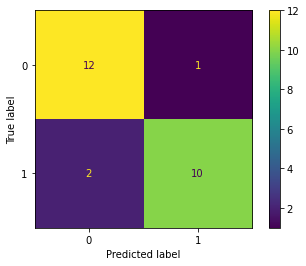

In [192]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

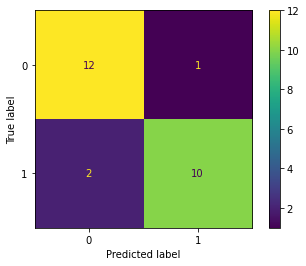

In [193]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test)

plt.show()

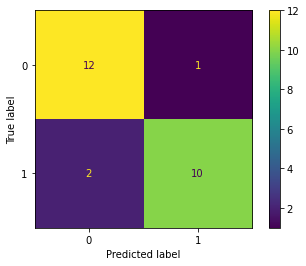

In [194]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)

plt.show()

### [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)


In [195]:
from sklearn.metrics import precision_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
precision_score(y_true, y_pred, average='macro')

0.2222222222222222

In [196]:
precision_score(y_true, y_pred, average='micro')

0.3333333333333333

In [197]:
precision_score(y_true, y_pred, average='weighted')

0.2222222222222222

In [198]:
precision_score(y_true, y_pred, average=None)

array([0.66666667, 0.        , 0.        ])

In [199]:
y_pred = [0, 0, 0, 0, 0, 0]
precision_score(y_true, y_pred, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.33333333, 0.        , 0.        ])

In [200]:
precision_score(y_true, y_pred, average=None, zero_division=1)

array([0.33333333, 1.        , 1.        ])

In [201]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
precision_score(y_true, y_pred, average=None)

array([0.5, 1. , 1. ])

### [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)


In [202]:
from sklearn.metrics import recall_score
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
recall_score(y_true, y_pred, average='macro')

0.3333333333333333

In [203]:
recall_score(y_true, y_pred, average='micro')

0.3333333333333333

In [204]:
recall_score(y_true, y_pred, average='weighted')

0.3333333333333333

In [205]:
recall_score(y_true, y_pred, average=None)

array([1., 0., 0.])

In [206]:
y_true = [0, 0, 0, 0, 0, 0]
recall_score(y_true, y_pred, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.5, 0. , 0. ])

In [207]:
recall_score(y_true, y_pred, average=None, zero_division=1)

array([0.5, 1. , 1. ])

In [208]:
# multilabel classification
y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
recall_score(y_true, y_pred, average=None)

array([1. , 1. , 0.5])

### [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) 


In [209]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
                    scoring=ftwo_scorer)

### [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)


In [211]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [212]:
y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

### [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)


In [213]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(
    y_true, y_scores)
precision

array([0.66666667, 0.5       , 1.        , 1.        ])

In [214]:
recall

array([1. , 0.5, 0.5, 0. ])

In [215]:
thresholds

array([0.35, 0.4 , 0.8 ])

### [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)


In [216]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr

array([0. , 0. , 0.5, 0.5, 1. ])

In [217]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [218]:
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

### [plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


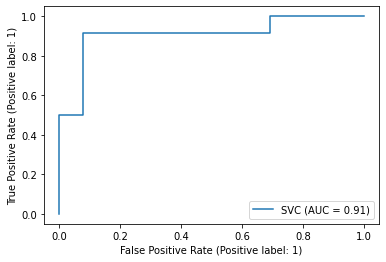

In [219]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test) 

plt.show()

## sklearn.decomposition

### [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [220]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [221]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [222]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289]
[6.30061232]


## sklearn.pipeline

### [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)


In [223]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), GaussianNB(priors=None))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

### [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)


In [224]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.88

### [FeatureUnion](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

In [225]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
union = FeatureUnion([("pca", PCA(n_components=1)),
                      ("svd", TruncatedSVD(n_components=2))])
X = [[0., 1., 3], [2., 2., 5]]
union.fit_transform(X)

array([[ 1.5       ,  3.03954967,  0.87243213],
       [-1.5       ,  5.72586357, -0.46312679]])

## sklearn.set_config

### [set_config](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html)

## sklearn.utils

### [all_estimators](https://scikit-learn.org/stable/modules/generated/sklearn.utils.all_estimators.html)

## sklearn.utils.multiclass

### [type_of_target](https://scikit-learn.org/stable/modules/generated/sklearn.utils.multiclass.type_of_target.html)

In [226]:
from sklearn.utils.multiclass import type_of_target
import numpy as np
type_of_target([0.1, 0.6])

'continuous'

In [227]:
type_of_target([1, -1, -1, 1])

'binary'

In [228]:
type_of_target(['a', 'b', 'a'])

'binary'

In [229]:
type_of_target([1.0, 2.0])

'binary'

In [230]:
type_of_target([1, 0, 2])

'multiclass'

In [231]:
type_of_target([1.0, 0.0, 3.0])

'multiclass'

In [232]:
type_of_target(['a', 'b', 'c'])

'multiclass'

In [233]:
type_of_target(np.array([[1, 2], [3, 1]]))

'multiclass-multioutput'

In [234]:
type_of_target([[1, 2]])

'multilabel-indicator'

In [235]:
type_of_target(np.array([[1.5, 2.0], [3.0, 1.6]]))

'continuous-multioutput'

In [236]:
type_of_target(np.array([[0, 1], [1, 1]]))

'multilabel-indicator'

## scipy.stats

### [uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)


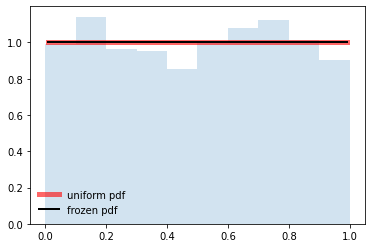

In [237]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:
mean, var, skew, kurt = uniform.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.
#Freeze the distribution and display the frozen pdf.

rv = uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = uniform.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

# Generate random numbers:
r = uniform.rvs(size=1000)

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### [loguniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loguniform.html)

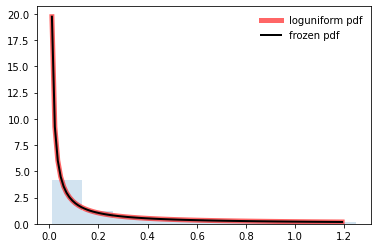

In [238]:
from scipy.stats import loguniform
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate the first four moments:
a, b = 0.01, 1.25
mean, var, skew, kurt = loguniform.stats(a, b, moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(loguniform.ppf(0.01, a, b),
                loguniform.ppf(0.99, a, b), 100)
ax.plot(x, loguniform.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='loguniform pdf')

# Freeze the distribution and display the frozen pdf:
rv = loguniform(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf
vals = loguniform.ppf([0.001, 0.5, 0.999], a, b)
np.allclose([0.001, 0.5, 0.999], loguniform.cdf(vals, a, b))

# Generate random numbers:
r = loguniform.rvs(a, b, size=1000)

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## imblearn.under_sampling

### [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

In [239]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
X, y = make_classification(n_classes=2, class_sep=2,
 weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


In [240]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 100, 1: 100})


## imblearn.over_sampling

### [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


In [241]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


In [242]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 900, 1: 900})


### [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [243]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


In [244]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 900, 1: 900})


## warnings

### [filterwarnings](https://stackoverflow.com/questions/29086398/sklearn-turning-off-warnings)

In [245]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## numpy

### [array](https://numpy.org/doc/1.23/reference/generated/numpy.array.html)


In [246]:
np.array([1, 2, 3])

array([1, 2, 3])

Upcasting

In [247]:
np.array([1, 2, 3.0])

array([1., 2., 3.])

More than one dimension:

In [248]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

Minimum dimensions 2:

In [249]:
np.array([1, 2, 3], ndmin=2)

array([[1, 2, 3]])

Type provided:

In [250]:
np.array([1, 2, 3], dtype='float64')

array([1., 2., 3.])

### [arange](https://numpy.org/doc/1.23/reference/generated/numpy.arange.html)


In [251]:
np.arange(3)

array([0, 1, 2])

In [252]:
np.arange(3.0)

array([0., 1., 2.])

In [253]:
np.arange(3,7)

array([3, 4, 5, 6])

In [254]:
np.arange(3,7,2)

array([3, 5])

In [255]:
np.arange(-3, 3, 0.5)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5])

### [linspace](https://numpy.org/doc/1.23/reference/generated/numpy.linspace.html)


In [256]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [257]:
np.linspace(2.0, 3.0, num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

In [258]:
np.linspace(2.0, 3.0, num=5, retstep=True)

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

Graphical illustration

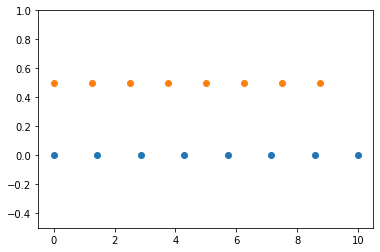

In [259]:
import matplotlib.pyplot as plt
N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])
plt.show()

### [logspace](https://numpy.org/doc/1.23/reference/generated/numpy.logspace.html)

In [260]:
np.logspace(2.0, 3.0, num=4)

array([ 100.        ,  215.443469  ,  464.15888336, 1000.        ])

In [261]:
np.logspace(2.0, 3.0, num=4, endpoint=False)

array([100.        , 177.827941  , 316.22776602, 562.34132519])

In [262]:
np.logspace(2.0, 3.0, num=4, base=2.0)

array([4.        , 5.0396842 , 6.34960421, 8.        ])

Graphical illustration

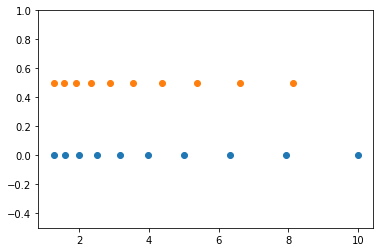

In [263]:
import matplotlib.pyplot as plt
N = 10
x1 = np.logspace(0.1, 1, N, endpoint=True)
x2 = np.logspace(0.1, 1, N, endpoint=False)
y = np.zeros(N)

plt.plot(x1, y, 'o')

plt.plot(x2, y + 0.5, 'o')

plt.ylim([-0.5, 1])
plt.show()

### [unique](https://numpy.org/doc/1.23/reference/generated/numpy.unique.html)


In [264]:
np.unique([1, 1, 2, 2, 3, 3])

array([1, 2, 3])

In [265]:
a = np.array([[1, 1], [2, 3]])
np.unique(a)

array([1, 2, 3])

Return the unique rows of a 2D array

In [266]:
a = np.array([[1, 0, 0], [1, 0, 0], [2, 3, 4]])
np.unique(a, axis=0)

array([[1, 0, 0],
       [2, 3, 4]])

Return the indices of the original array that give the unique values:

In [267]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
u, indices = np.unique(a, return_index=True)
print(u)
print(indices)

['a' 'b' 'c']
[0 1 3]


In [268]:
a[indices]

array(['a', 'b', 'c'], dtype='<U1')

Reconstruct the input values from the unique values and counts:

In [269]:
a = np.array([1, 2, 6, 4, 2, 3, 2])
values, counts = np.unique(a, return_counts=True)
print(values)
print(counts)

[1 2 3 4 6]
[1 3 1 1 1]


In [270]:
np.repeat(values, counts)  # original order not preserved

array([1, 2, 2, 2, 3, 4, 6])

### [zeros](https://numpy.org/doc/1.23/reference/generated/numpy.zeros.html), [ones](https://numpy.org/doc/1.23/reference/generated/numpy.ones.html)


In [271]:
np.zeros((5,), dtype=int)

array([0, 0, 0, 0, 0])

In [272]:
np.ones((5,), dtype=int)

array([1, 1, 1, 1, 1])

In [273]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [274]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [275]:
np.zeros((2,), dtype=[('x', 'i4'), ('y', 'i4')]) # custom dtype

array([(0, 0), (0, 0)], dtype=[('x', '<i4'), ('y', '<i4')])

### [where](https://numpy.org/doc/1.23/reference/generated/numpy.where.html)


In [276]:
a = np.arange(10)

np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

This can be used on multidimensional arrays too:

In [277]:
np.where([[True, False], [True, True]],
         [[1, 2], [3, 4]],
         [[9, 8], [7, 6]])

array([[1, 8],
       [3, 4]])

The shapes of x, y, and the condition are broadcast together:

In [278]:
x, y = np.ogrid[:3, :4]

In [279]:
np.where(x < y, x, 10 + y)  # both x and 10+y are broadcast

array([[10,  0,  0,  0],
       [10, 11,  1,  1],
       [10, 11, 12,  2]])

A simple *where* clause yields an tuple of lists; from each list, pick up an index to make co-ordinates.  In this case, following coordinates can be created (0, 0) (0, 1), (0, 2)...(2,1)

In [280]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])

np.where(a < 4)

(array([0, 0, 0, 1, 1, 2, 2]), array([0, 1, 2, 0, 1, 0, 1]))

In [281]:
np.where(a < 4, a, -1)  # -1 is broadcast

array([[ 0,  1,  2],
       [ 0,  2, -1],
       [ 0,  3, -1]])

### [argmax](https://numpy.org/doc/1.23/reference/generated/numpy.argmax.html)


In [282]:
a = np.arange(6).reshape(2,3) + 10

In [283]:
np.argmax(a)


5

In [284]:
np.argmax(a, axis=0)


array([1, 1, 1])

In [285]:
np.argmax(a, axis=1)

array([2, 2])

In [286]:
# Indexes of the maximal elements of a N-dimensional array
ind = np.unravel_index(np.argmax(a, axis=None), a.shape)
ind

(1, 2)

In [287]:
a[ind]

15

In [288]:
b = np.arange(6)
b[1] = 5
np.argmax(b)  # Only the first occurrence is returned.

1

In [289]:
x = np.array([[4,2,3], [1,0,3]])
index_array = np.argmax(x, axis=-1)
# Same as np.amax(x, axis=-1, keepdims=True)
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1)

array([[4],
       [3]])

In [290]:
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)

array([4, 3])

In [291]:
# Setting keepdims to True,
x = np.arange(24).reshape((2, 3, 4))
res = np.argmax(x, axis=1)
res.shape

(2, 4)

### [argmin](https://numpy.org/doc/1.23/reference/generated/numpy.argmin.html)

In [292]:
a = np.arange(6).reshape(2,3) + 10

In [293]:
np.argmin(a)

0

In [294]:
np.argmin(a, axis=0)

array([0, 0, 0])

In [295]:
np.argmin(a, axis=1)

array([0, 0])

In [296]:
ind = np.unravel_index(np.argmin(a, axis=None), a.shape)
ind

(0, 0)

In [297]:
a[ind]

10

In [298]:
b = np.arange(6) + 10
b[4] = 10
np.argmin(b)  # Only the first occurrence is returned.

0

In [299]:
x = np.array([[4,2,3], [1,0,3]])
index_array = np.argmin(x, axis=-1)
# Same as np.amin(x, axis=-1, keepdims=True)
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1)

array([[2],
       [0]])

In [300]:
# Same as np.amax(x, axis=-1)
np.take_along_axis(x, np.expand_dims(index_array, axis=-1), axis=-1).squeeze(axis=-1)

array([2, 0])

### [argsort](https://numpy.org/doc/1.23/reference/generated/numpy.argsort.html)

One dimensional array

In [301]:
x = np.array([3, 1, 2])
np.argsort(x)

array([1, 2, 0])

Two dimensional array

In [302]:
x = np.array([[0, 3], [2, 2]])
ind = np.argsort(x, axis=0)  # sorts along first axis (down)
ind

array([[0, 1],
       [1, 0]])

In [303]:
np.take_along_axis(x, ind, axis=0)  # same as np.sort(x, axis=0)

array([[0, 2],
       [2, 3]])

In [304]:
ind = np.argsort(x, axis=1)  # sorts along last axis (across)
ind

array([[0, 1],
       [0, 1]])

In [305]:
np.take_along_axis(x, ind, axis=1)  # same as np.sort(x, axis=1)

array([[0, 3],
       [2, 2]])

Indices of the sorted elements of a N-dimensional array:

In [306]:
ind = np.unravel_index(np.argsort(x, axis=None), x.shape)
ind

(array([0, 1, 1, 0]), array([0, 0, 1, 1]))

In [307]:
x[ind]  # same as np.sort(x, axis=None)

array([0, 2, 2, 3])

Sorting with keys:

In [308]:
x = np.array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])
x

array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')])

In [309]:
np.argsort(x, order=('x','y'))

array([1, 0])

In [310]:
np.argsort(x, order=('y','x'))

array([0, 1])

### [random.seed](https://numpy.org/doc/1.23/reference/random/generated/numpy.random.seed.html)


Legacy function

In [311]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(123456789)))

In [312]:
# Later, you want to restart the stream
rs = RandomState(MT19937(SeedSequence(987654321)))

In [313]:
rs.choice(100)

33

### [random.permutation](https://numpy.org/doc/1.23/reference/random/generated/numpy.random.permutation.html)


In [314]:
np.random.permutation(10)

array([3, 7, 2, 9, 4, 6, 5, 8, 1, 0])

In [315]:
np.random.permutation([1, 4, 9, 12, 15])

array([15,  9,  1,  4, 12])

In [316]:
arr = np.arange(9).reshape((3, 3))
np.random.permutation(arr)

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

### [count_nonzero](https://numpy.org/doc/1.23/reference/generated/numpy.count_nonzero.html)

In [317]:
np.count_nonzero(np.eye(4))


4

In [318]:
a = np.array([[0, 1, 7, 0],
              [3, 0, 2, 19]])
np.count_nonzero(a)

5

In [319]:
np.count_nonzero(a, axis=0)

array([1, 1, 2, 1])

In [320]:
np.count_nonzero(a, axis=1)

array([2, 3])

In [321]:
np.count_nonzero(a, axis=1, keepdims=True)

array([[2],
       [3]])

### [var](https://numpy.org/doc/1.23/reference/generated/numpy.var.html), [std](https://numpy.org/doc/1.23/reference/generated/numpy.std.html)


In [322]:
a = np.array([[1, 2], [3, 4]])
np.var(a)

1.25

In [323]:
np.var(a, axis=0)

array([1., 1.])

In [324]:
np.var(a, axis=1)

array([0.25, 0.25])

In [325]:
a = np.zeros((2, 512*512), dtype=np.float32)
a[0, :] = 1.0
a[1, :] = 0.1
np.var(a)

0.20250003

In [326]:
np.var(a, dtype=np.float64) # variance is more accurate in float

0.2024999993294476

Specifying a where argument:

In [327]:
a = np.array([[14, 8, 11, 10], [7, 9, 10, 11], [10, 15, 5, 10]])
np.var(a)

6.833333333333333

In [328]:
np.var(a, where=[[True], [True], [False]]) # only first two rows

4.0

In [329]:
np.var(a, where=[True, True, False, False]) # only first two columns

8.916666666666666

### [row_stack](https://numpy.org/doc/1.23/reference/generated/numpy.row_stack.html) (vstack)

In [330]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [331]:
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.vstack((a,b))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### [column_stack](https://numpy.org/doc/1.23/reference/generated/numpy.column_stack.html) (hstack)

In [332]:
a = np.array([1,2,3])
b = np.array([2,3,4])
np.column_stack((a,b))

array([[1, 2],
       [2, 3],
       [3, 4]])

## pandas

### [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


In [333]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [334]:
# Notice that the inferred dtype is int64.
df.dtypes

col1    int64
col2    int64
dtype: object

In [335]:
# To enforce a single dtype:
df = pd.DataFrame(data=d, dtype=np.int8)
df.dtypes

col1    int8
col2    int8
dtype: object

In [336]:
# Constructing DataFrame from a dictionary including Series:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


In [337]:
# Constructing DataFrame from numpy ndarray:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [338]:
# Constructing DataFrame from a numpy ndarray that has labeled columns:
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)],
                dtype=[("a", "i4"), ("b", "i4"), ("c", "i4")])
df3 = pd.DataFrame(data, columns=['c', 'a'])
df3

,c,a
0,3,1
1,6,4
2,9,7


### [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [339]:
# Downloads test.csv with no header, and two columns Col1 and Col2.
# pd.read_csv('test.csv', header=None, names=['Col1', 'Col2'])

### [concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)


Combine two Series.

In [340]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

Clear the existing index and reset it in the result by setting the ignore_index option to True.

In [341]:
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

Add a hierarchical index at the outermost level of the data with the keys option.

In [342]:
pd.concat([s1, s2], keys=['s1', 's2'])

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

Label the index keys you create with the names option.

In [343]:
pd.concat([s1, s2], keys=['s1', 's2'],
          names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

Combine two DataFrame objects with identical columns.

In [344]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
pd.concat([df1, df2], ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


Combine DataFrame objects with overlapping columns and return everything. Columns outside the intersection will be filled with NaN values.

In [345]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])

pd.concat([df1, df3], sort=False, ignore_index=True)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
2,c,3,cat
3,d,4,dog


Combine DataFrame objects with overlapping columns and return only those that are shared by passing inner to the join keyword argument.

In [346]:
pd.concat([df1, df3], join="inner", ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


Combine DataFrame objects horizontally along the x axis by passing in axis=1.

In [347]:
df4 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [348]:
df5 = pd.DataFrame([1], index=['a'])
df6 = pd.DataFrame([2], index=['a'])
try:
  pd.concat([df5, df6], verify_integrity=True) # Raises exception.  Opposite of ignore_index=True.
except ValueError:
  print("Exception raised!")

Exception raised!


### [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)


In [349]:
s = pd.Series(list('abca'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [350]:
s1 = ['a', 'b', np.nan]
pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


In [351]:
pd.get_dummies(s1, dummy_na=True)

,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [352]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [353]:
pd.get_dummies(pd.Series(list('abcaa')))

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [354]:
pd.get_dummies(pd.Series(list('abcaa')), drop_first=True)

,b,c
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


In [355]:
pd.get_dummies(pd.Series(list('abc')), dtype=float)

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


### var, std

## pandas.plotting

### [scatter_matrix](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa336cd150>,
      dtype=object)

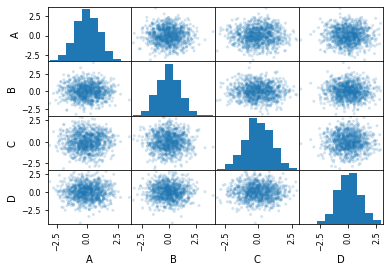

In [356]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
pd.plotting.scatter_matrix(df, alpha=0.2)

## sns

### [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)


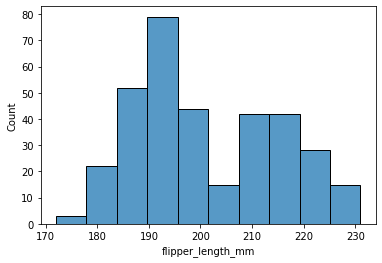

In [357]:
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm")

Flip the plot by assigning the data variable to the y axis:

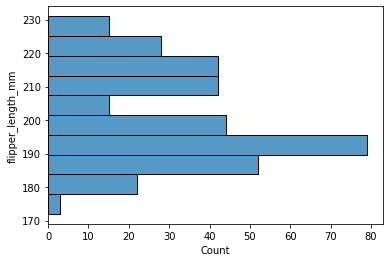

In [358]:
sns.histplot(data=penguins, y="flipper_length_mm")

Check how well the histogram represents the data by specifying a different bin width:

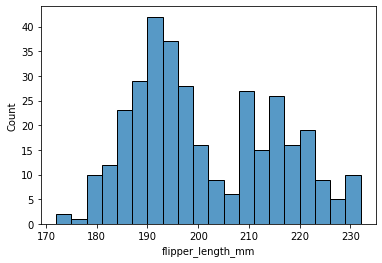

In [359]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

You can also define the total number of bins to use:

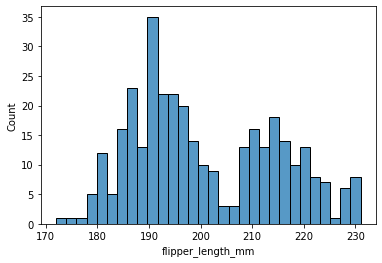

In [360]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

### [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)


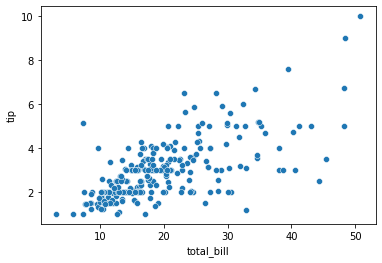

In [361]:
tips = sns.load_dataset("tips")
sns.scatterplot(data=tips, x="total_bill", y="tip")

Assigning a variable to hue will map its levels to the color of the points:

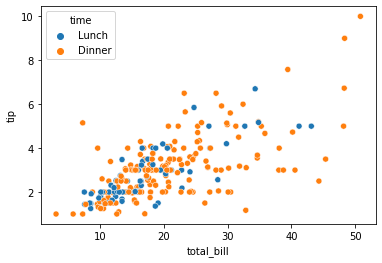

In [362]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

Pass the name of a categorical palette or explicit colors (as a Python list of dictionary) to force categorical mapping of the hue variable:

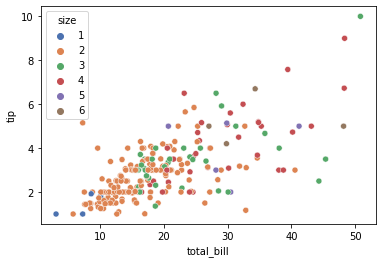

In [363]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep")

### [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)


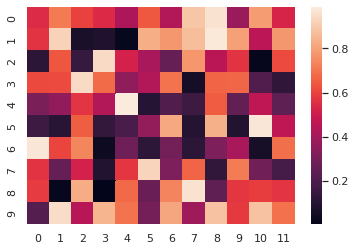

In [364]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

Plot a dataframe with meaningful row and column labels:

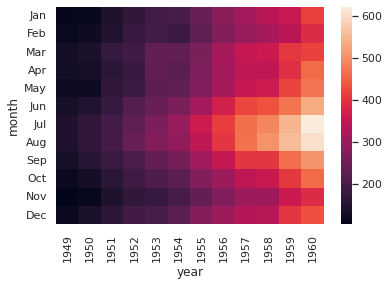

In [365]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

Annotate each cell with the numeric value using integer formatting:

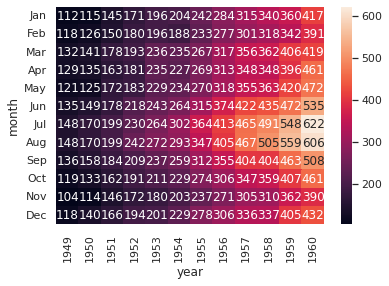

In [366]:
ax = sns.heatmap(flights, annot=True, fmt="d")

Use a different colormap:

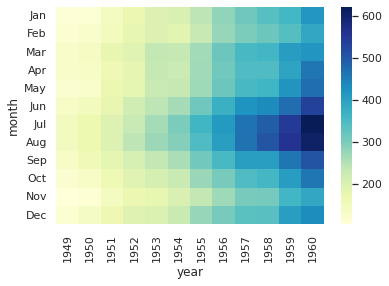

In [367]:
ax = sns.heatmap(flights, cmap="YlGnBu")

### [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


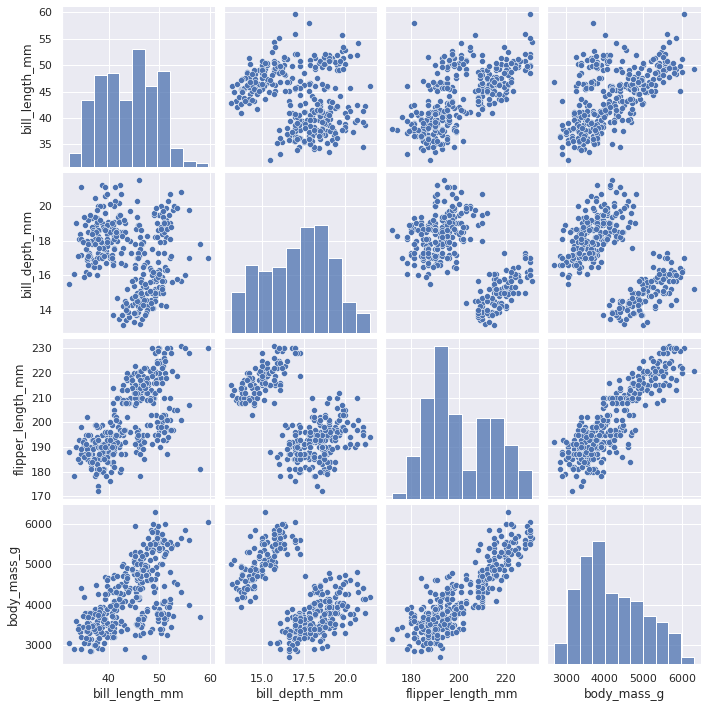

In [368]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE):

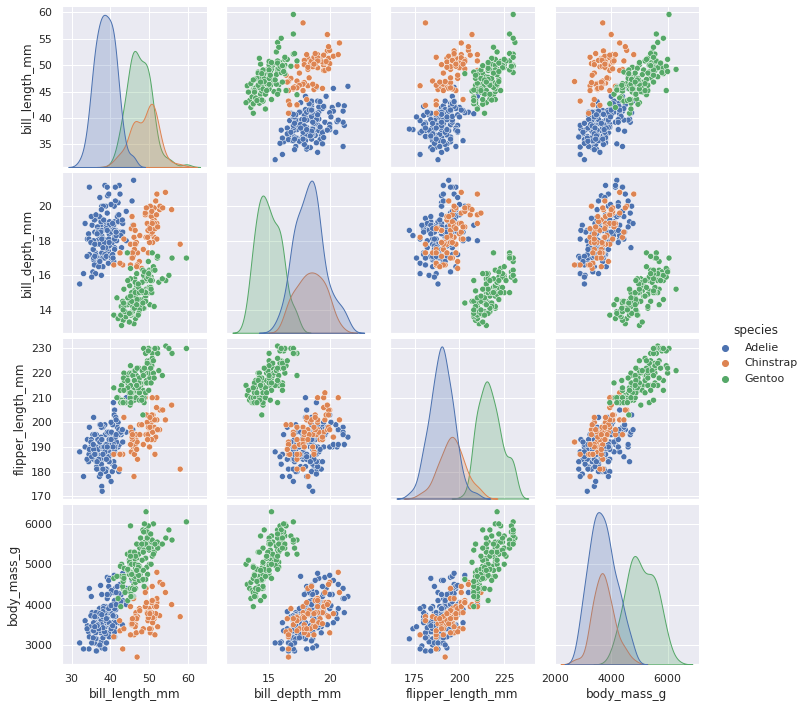

In [369]:
sns.pairplot(penguins, hue="species")

Or histplot() to draw both bivariate and univariate histograms:

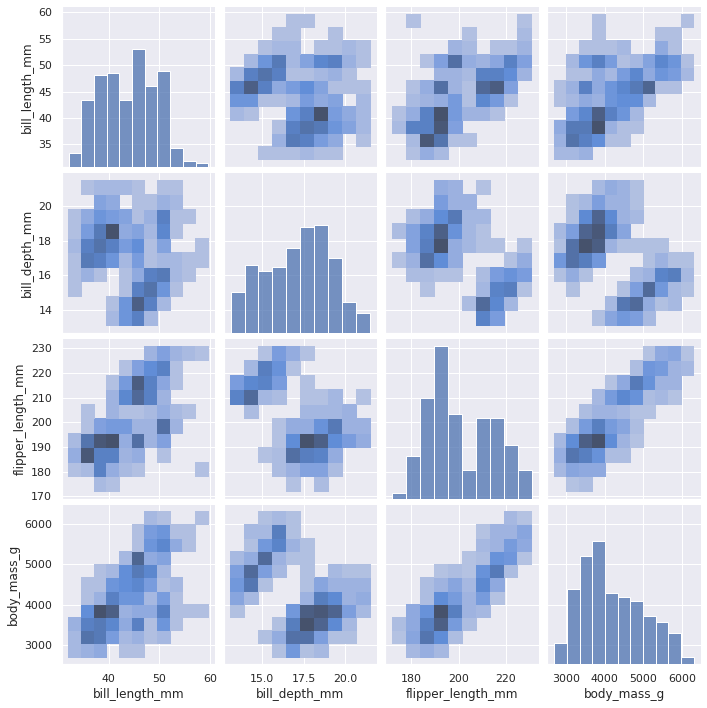

In [370]:
sns.pairplot(penguins, kind="hist")

### [set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html)

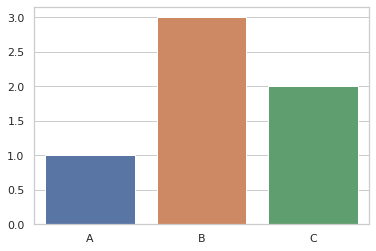

In [371]:
sns.set_style("whitegrid")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

You can also selectively override seaborn’s default parameter values:

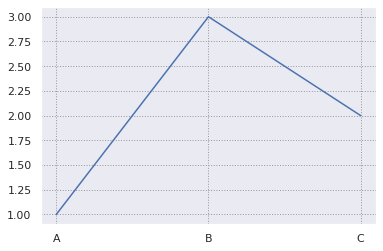

In [372]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(x=["A", "B", "C"], y=[1, 3, 2])